In [29]:
import numpy as np

import matplotlib.pyplot as plt 
import cv2 
#from google.colab.patches import cv2_imshow



если работа ведется в гугл колаб, то нужно подгрузить файлы в гугл

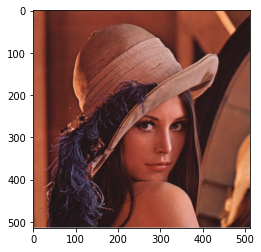

(dtype('uint8'), 3, (514, 512, 3), 789504)

In [44]:
img = cv2.imread('TestImg.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img.dtype, img.ndim, img.shape, img.size

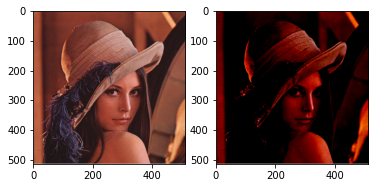

In [52]:
img_normed = img / 127.5 - 1.0

fig, ax =plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(img_normed)
plt.show()



In [46]:
print("orgignal img:", img.mean(), img.std())
print("Normed img:", img_normed.mean(), img_normed.std())

orgignal img: 80.38185620338845 53.021287575598556
Normed img: -0.3695540689930317 0.4158532358870474


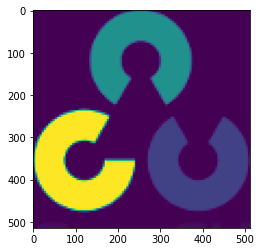

In [58]:
img_cv = cv2.imread('opencv.png', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[:2]
plt.imshow(img_cv)
plt.show()

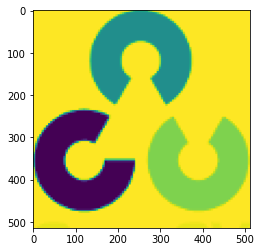

In [64]:
img_cv_resized = cv2.resize(img_cv, (w,h), interpolation=cv2.INTER_AREA)
img_cv_inv = 255 - img_cv_resized
plt.imshow(img_cv_inv)
plt.show()

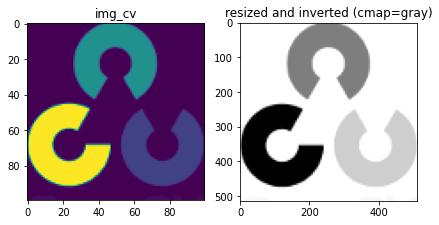

img_cv shape: (100, 100)
'resized and inverted shape (514, 512)


In [61]:
_, ax = plt.subplots(1,2, figsize=(7,4))
ax[0].imshow(img_cv)
ax[1].imshow(img_cv_inv, cmap='gray')
ax[0].set_title('img_cv')
ax[1].set_title('resized and inverted (cmap=gray)')
plt.show()

print("img_cv shape:", img_cv.shape)
print("'resized and inverted shape", img_cv_resized.shape)

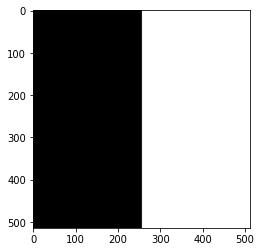

0 255


In [65]:
mask = np.zeros(img.shape, dtype='uint8')
width =img_cv_inv.shape[0]
mask[:, width//2:] = 255

plt.imshow(mask)
plt.show()

print(mask.min(), mask.max())

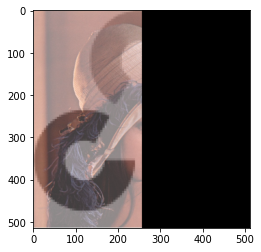

In [83]:
lam = 0.5

img_composed = img.copy()
img_composed = lam * img + (1 - lam) * img_cv_inv[..., np.newaxis]

np.putmask(img_composed, mask=mask, values=0)

plt.imshow(img_composed.astype('uint8'))
plt.show()

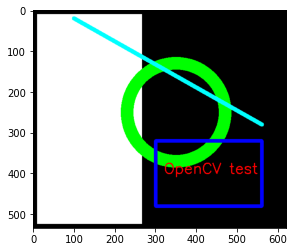

In [98]:
img_draw = cv2.copyMakeBorder(img_composed, 10, 10, 10, 100,cv2.BORDER_CONSTANT)
cv2.circle(img_draw, (350, 250), 120, (0, 255, 0), 30)
cv2.line(img_draw, (100, 20), (560, 280), (0, 255, 255), 10)
cv2.rectangle(img_draw, (300, 320), (560, 480), (0, 0, 255), 7)
cv2.putText(img_draw, 'OpenCV test', (320, 400), cv2.FONT_HERSHEY_SIMPLEX,
1.2, (255, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img_draw)
plt.show()


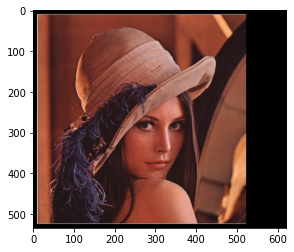

In [101]:
img_draw2 = cv2.copyMakeBorder(img, 10, 10, 10, 100,cv2.BORDER_CONSTANT)
#cv2.circle(img_draw, (350, 250), 120, (0, 255, 0), 30)
#cv2.line(img_draw, (100, 20), (560, 280), (0, 255, 255), 10)
#cv2.rectangle(img_draw, (300, 320), (560, 480), (0, 0, 255), 7)
#cv2.putText(img_draw, 'OpenCV test', (320, 400), cv2.FONT_HERSHEY_SIMPLEX,
#1.2, (255, 0, 0), 2, cv2.LINE_AA)
plt.imshow(img_draw2)
plt.show()


In [102]:
def invert_cycle_python(image: np.ndarray):
 h, w = image.shape[:2]
 for x in range(w):
  for y in range(h):
   image[y, x] = 255 - image[y, x]
 return image
%timeit invert_cycle_python(img_draw.copy())
%timeit 255 - img_draw

776 ms ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
756 µs ± 30.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
